# Lecture 4.1 - NLP with NLTK

## Natural Language Processing

Many of the examples below are taken from the [NLTK book](http://www.nltk.org/book/) Before we start, we should install all the required material. Run the cell below to install the tools and corpora. This can take a minute...

Please run the cell below to install the additional material.

In [2]:
import nltk
nltk.download('book')

## Introduction to Python's Natural Language Toolkit (NLTK)

First, I demonstrate the power of the NLTK by inspecting some of the **prepared corpora** of this library. Later on, I show how you can build your own corpus, and unleash all the nice tools on **your own data**.

In the Digital Humanities, we often treat texts as *raw data*, as input for our programs. Interpretations arise from abstraction, for example, by counting word frequencies, analysing specific segments of a corpus (i.e. Key Word In Context, or KWIC analysis) or searching for patterns (i.e. collocations). 

NLTK provides several tools for both **processing** data and **interpreting** texts.

Let's see what corpora NLTK provides by loading the `book` module from the library.

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


`from nltk.book import *` says as much as "from NLTK's book module, load all items." This loads all the books that are processed in advance for further analysis.

From the above output, we discover that NLTK includes the script of 'Monty Python and the Holy Grail'. When we `print` text6 we (surprisingly) can not see the actual content yet.

In [ ]:
print(text6)

As a standard procedure, we should uncover the data type of the object we are dealing with.

In [ ]:
print(type(text6))

In [ ]:
dir(text6)

To text is stored in the `tokens` attribute. 

Let's print the first hundred tokens.

In [ ]:
print(text6.tokens[:100])

We see that the text is already properly tokenized (i.e. words and punctuation marks are properly separated from each other).

But we can do more with this `Text` object. To view all the methods attached to this object, use Python's help function. You can ignore all those that start with a double underscore and scroll down.

In [ ]:
help(nltk.text.Text)

Let's inspect some of the methods attached to the `Text` object.

### `.concordance()`

An oft-used technique for distant reading is **Keyword In Context Analysis** in which we centre a whole corpus on a specific word of interest. NLTK comes with a `concordance()` method that allows you to do just this. For example, how is the word 'grail' used in  'Monty Python and the Holy Grail'?

In [ ]:
help(nltk.text.Text.concordance)

In [ ]:
text6.concordance('grail')

A more realistic research question would be: how have American presidents used 'democracy' in their Inaugural Addresses since 1861? Try to do this in the cell below.

In [ ]:
text4.concordance('democracy')

We can specify the number of hits to print with the `lines` argument.

In [ ]:
text4.concordance('democracy',lines=100)

What about 'monstrous' in Moby Dick?

In [ ]:
text1.concordance('monstrous')

### `.similar()`

`concordance()` shows words in their context. For example, we saw that monstrous occurred in contexts such as the \_\_\_ pictures and a \_\_\_ size. What other words appear in a **similar range of contexts**? We can find out by appending the term similar to the name of the text in question, then enter the word you want analyse within parentheses (don't forget to put a string between quotation marks):

In [ ]:
#text1: Moby Dick by Herman Melville 1851
text1.similar("monstrous")
print('\n')
#text2: Sense and Sensibility by Jane Austen 1811
text2.similar("monstrous")

Observe that we get **different results for different texts**. Austen uses this word quite differently from Melville; for her, monstrous has positive connotations and sometimes functions as an intensifier like the word very.

In [ ]:
print(text5.similar("cool"))
print('\n')
print(text1.similar("cool"))

The method `common_contexts` allows us to **examine just the contexts** that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:

In [ ]:
text2.common_contexts(["monstrous", "very"])

### `.dispersion_plot()`

We can also determine the **location** of a word in the text: how many words from the beginning it appears. This **positional information** can be displayed using a dispersion plot. Each **stripe** represents an instance of a word, and each **row** represents the entire text. In 1.2 we see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end). You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? As before, take care to get the quotes, commas, brackets and parentheses exactly right.

In [ ]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

### `collocations`

A collocation is a **sequence of words that occur together unusually often**. Thus *red wine* is a collocation, whereas *the wine* is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

In [ ]:
text1.collocations()

### Back to the tokens

Still, we still have not inspected the actual text. NLTK represents texts as a list (an inbuilt data type we encountered earlier). Let's find out where this information is hidden.

In [ ]:
dir(text1)

In [ ]:
type(text1.tokens)

`text1.tokens` returns a list, something which we are familiar with by now. So let's print the first hundred tokens of Moby Dick

In [ ]:
print(text1.tokens[:100])

Let's determine the length of a text from start to finish, in terms of the **words and punctuation** symbols that appear--if you have a closer look at the output of the previous print statement, you'll see that it comprises punctuation marks as individual items. We use the function len to obtain the length of a list, which we'll apply here to the book of Moby Dick:

In [ ]:
print(len(text1.tokens))

**Exercise**: Is "Sense and Sensibility" longer than "Moby Dick"?

In [5]:
len(text2.tokens) > len(text1.tokens)
# actually this also works: len(text2) > len(text1)

False

A **token** is the technical name for a **sequence of characters** — such as hairy, his, or :) — that we want to **treat as a group** (or **unit** of our analysis). When we count the number of tokens in a text, say, the phrase "to be or not to be", we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of "to", two of "be", and one each of "or" and "not". 

But there are only **four distinct** vocabulary items in this phrase. How many distinct words does the book of Genesis contain? To work this out in Python, we have to pose the question slightly differently. The vocabulary of a text is just the **set of tokens** that it uses, since in a set, **all duplicates are collapsed together**. In Python we can obtain the vocabulary items of text3 with the command: `set(text3)`. When you do this, many screens of words will fly past. Now try the following:

In [6]:
print(len(text3.tokens))
print(len(set(text3.tokens)))

44764
2789


Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types." A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items types instead of word types.

**Exercise**: does Moby Dick contain more types than Genesis?

In [7]:
len(set(text1)) > len(set(text3))

True

Now, let's calculate a measure of the **lexical richness** of the text. The next example shows us that the number of **distinct words** is just 6% of the total number of words, or equivalently that each word is used 16 times on average

In [8]:
len(set(text3.tokens)) / len(text3.tokens)

0.06230453042623537

Next, let's focus on particular words. We can count **how often a word occurs** in a text, and compute what percentage of the text is taken up by a specific word:

In [ ]:
print(100 * text1.count('whale') / len(text1))
print(100 * text3.count('whale') / len(text3))

You may want to repeat such calculations on several texts, but it is tedious to keep retyping the formula. Instead, you can come up with your own name for a task, like "lexical_diversity" or "percentage", and associate it with a block of code. Now you only have to type a short name instead of one or more complete lines of Python code, and you can **re-use** it as often as you like. The block of code that does a task for us is called a **function**, and we define a **short name** for our function with the **keyword def**. The next example shows how to define two new functions, lexical_diversity() and  percentage():

In [10]:
def lexical_diversity(text):
        return len(set(text)) / len(text)
    
def percentage(count, total):
        return 100 * count / total


In [ ]:
lexical_diversity(text3)

**Exercise**: print the percentage of the word 'poor' in the Genesis using the percentage function

In [11]:
count = text3.count('poor')
total = len(text3)
print(percentage(count,total))

0.002233937985881512


We could make the `percentage` function a bit more useful:

In [13]:
def percentage(word, text):
    count = text.count(word)
    total = len(text)
    return 100 * count / total

print(percentage('poor',text3))

0.002233937985881512


**Exercise**: Which texts talk most often about 'love'?

In [20]:
word_to_count = 'love'

maximum = text1.count(word_to_count)
book = str(text1)

for text in [text1,text2,text3,text4,text5,text6,text7,text8,text9]:
    count = text.count(word_to_count)
    if count > maximum:
        maximum = count
        book = str(text)
        
print('The highest count for word ' + word_to_count+ ' is found in book ' + book +' and is equal to '+ str(maximum))

The highest count for word love is found in book <Text: Sense and Sensibility by Jane Austen 1811> and is equal to 77


Below I explain what happens in the code above by adding explanations using the # and adding print statements. Basically, we first assume the maximum value is zero and loop over the other texts. For each text, we check how often the word 'love' occurs. If our search term appears more often we replace the variable `maximum` with the value of the variable `count`. Then we go the next text. The variable `maximum` saves the highest values encountered so far.

In [37]:
word_to_count = 'love' # define the word you want to

maximum = 0 # assume maximum is zero
book = '' # assume no book is found

for text in [text1,text2,text3,text4,text5,text6,text7,text8,text9]: # loop over all texts
    count = text.count(word_to_count) # count how often the word appears in this text
    print('The word '+ word_to_count +' appears '+ str(count) + ' times in ' + str(text) )
    print('The existing maximum value at this stage is ' + str(maximum) )
    if count > maximum: # check if this count is higher as the current maximum value
        print('\n!!! Something important happening here. Replacing maximum value!')
        print('Because ' + str(count) + ' > ' + str(maximum) + ' we replace the maximum value')
        maximum = count # if so, replace the value for the variable maximum with the one that is stored in count
        book = str(text) # this is just a nice addition, so we can later check which book
        print('The maximum value is now equal to ' + str(maximum) + ' and is found in ' + str(text))
        print('End of the if condition.\n')
    else:
        print('Because ' + str(count) + ' < ' + str(maximum) + ' we do not replace the maximum value\n')
        
print('The highest count for word ' + word_to_count+ ' is found in book ' + book +' and is equal to '+ str(maximum))

The word love appears 24 times in <Text: Moby Dick by Herman Melville 1851>
The existing maximum value at this stage is 0

!!! Something important happening here. Replacing maximum value!
Because 24 > 0 we replace the maximum value
The maximum value is now equal to 24 and is found in <Text: Moby Dick by Herman Melville 1851>
End of the if condition.

The word love appears 77 times in <Text: Sense and Sensibility by Jane Austen 1811>
The existing maximum value at this stage is 24

!!! Something important happening here. Replacing maximum value!
Because 77 > 24 we replace the maximum value
The maximum value is now equal to 77 and is found in <Text: Sense and Sensibility by Jane Austen 1811>
End of the if condition.

The word love appears 4 times in <Text: The Book of Genesis>
The existing maximum value at this stage is 77
Because 4 < 77 we do not replace the maximum value

The word love appears 49 times in <Text: Inaugural Address Corpus>
The existing maximum value at this stage is 77
Be

Now change the term to search for to 'war' and see what happens!

**Exercise**: Which of books listed above has the highest lexical diversity? If we do not have a good guess for `maximum` we just take an arbitrary book and compare its lexical diversity to the others.

In [41]:
word_to_count = 'love' # define the word you want to

maximum = lexical_diversity(text1) # assume maximum is equal to text1
book = '' # assume no book is found

for text in [text1,text2,text3,text4,text5,text6,text7,text8,text9]: # loop over all texts
    div = lexical_diversity(text) 
    print('The existing maximum lexical diversity at this iteration is ' + str(maximum))
    print(str(text) + ' has a lexical diversity of ',str(div)) 
    if div > maximum: # check if this count is higher as the current maximum value
        print('\n!!! Something important happening here. Replacing maximum value!')
        print('Because ' + str(div) + ' > ' + str(maximum) + ' we replace the maximum value')
        maximum = count # if so, replace the value for the variable maximum with the one that is stored in div
        book = str(text) # this is just a nice addition, so we can later check which book
        print('The maximum value is now equal to ' + str(maximum) + ' and is found in ' + str(text))
        print('End of the if condition.\n')
    else:
        print('Because ' + str(div) + ' < ' + str(maximum) + ' we do not replace the maximum value\n')
        
print('The highest lexial diversity of ' + str(maximum) + ' is found in book ' + book)

The existing maximum lexical diversity at this iteration is 0.07406285585022564
<Text: Moby Dick by Herman Melville 1851> has a lexical diversity of  0.07406285585022564
Because 0.07406285585022564 < 0.07406285585022564 we do not replace the maximum value

The existing maximum lexical diversity at this iteration is 0.07406285585022564
<Text: Sense and Sensibility by Jane Austen 1811> has a lexical diversity of  0.04826383002768831
Because 0.04826383002768831 < 0.07406285585022564 we do not replace the maximum value

The existing maximum lexical diversity at this iteration is 0.07406285585022564
<Text: The Book of Genesis> has a lexical diversity of  0.06230453042623537
Because 0.06230453042623537 < 0.07406285585022564 we do not replace the maximum value

The existing maximum lexical diversity at this iteration is 0.07406285585022564
<Text: Inaugural Address Corpus> has a lexical diversity of  0.06692970116993173
Because 0.06692970116993173 < 0.07406285585022564 we do not replace the ma

## Preprocessing

Up to this point, you might wonder: what if I want to investigate *other* texts? Of course, this is possible but requires some *preprocessing* steps. We have to **tokenize** the document on your computer or on the Web (which is just a sequence of characters) to an NLTK `Text` object.

Before we do this, let's inspects some of NLTK's preprocessing tools.

In the previous lecture, we have already covered a few common preprocessing steps such a removing punctuation and lower casing. Here we will take a slightly different route because NLTK takes cares of many of issues that required these steps.

### Sentence Tokenization

Often it is useful to process a text by sentence, if we want, for example, inquire the use of different words within its meaningful context. 

In [42]:
from nltk.tokenize import sent_tokenize
book = 'This is a sentence. And this another one!'
sent_tokenize(book)

['This is a sentence.', 'And this another one!']

**Exercise**: How many sentences does Tolstoy's 'War and Peace' contain (approximately)?

In [45]:
import requests
data = requests.get('http://www.gutenberg.org/files/2600/2600-0.txt').text
sents = sent_tokenize(data)
print(len(sents))

26547


### Word Tokenization

As alluded to earlier, 'tokens' are the minimal units for the machine to process. We often simply equated this with words, which, in turn, were defined as everything between to whitespaces--but the relationship is more complex. Luckily, NLTK comes with many ready-made tools for splitting strings into tokens.

In [46]:
from nltk.tokenize import word_tokenize

In [ ]:
sentence = "On the 12th of August, 18-- (just three days after my tenth birthday, when I had been given such wonderful presents), I was awakened at seveno’clock in the morning by Karl Ivanitch slapping the wall close to my head with a fly-flap made of sugar paper and a stick."

In [ ]:
print(word_tokenize(sentence))

There is not one "correct" method for tokenizing texts. Therefore NLTK comes with many different tokenizers. What are their differences?

In [ ]:
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize

In [ ]:
print(sentence.split())

In [ ]:
print(regexp_tokenize(sentence, pattern='\w+'))

In [ ]:
print(wordpunct_tokenize(sentence))

**Exercise**: How many tokens are there in 'War and Peace'? How many unique words?

In [47]:
tokens = word_tokenize(data)
print(len(tokens))
print(len(set(tokens)))

674585
22665


**Exercise**: read in Hobbes' "Leviathan", lowercase the whole book, split it by sentence, and then tokenize each sentence into words.
> To lowercase use the `lowercase()` method.

In [77]:
url = 'http://www.gutenberg.org/cache/epub/3207/pg3207.txt'
data = requests.get(url).text
sentences = sent_tokenize(data) # tokenize the text by sentence

tokenized_sentences = [] # create an empty variable where we store the text tokenized first by sentence and then by word

for sentence in sentences: # loop over all sentences
    sentence_lower = sentence.lower() # lowercase the sentence
    sentence_tokens = word_tokenize(sentence_lower) # tokenize the sentence
    tokenized_sentences.append(sentence_tokens) # save the tokenized sentence to the list with the name tokenized_sentences
    
print(len(tokenized_sentences))

6038


In [78]:
# print a few items in the tokenized_sentences list 
print(tokenized_sentences[100:150]) # each item is the list is again a list (see nested lists)

[['he', 'that', 'is', 'to', 'govern', 'a', 'whole', 'nation', ',', 'must', 'read', 'in', 'himselfe', ',', 'not', 'this', ',', 'or', 'that', 'particular', 'man', ';', 'but', 'man-kind', ';', 'which', 'though', 'it', 'be', 'hard', 'to', 'do', ',', 'harder', 'than', 'to', 'learn', 'any', 'language', ',', 'or', 'science', ';', 'yet', ',', 'when', 'i', 'shall', 'have', 'set', 'down', 'my', 'own', 'reading', 'orderly', ',', 'and', 'perspicuously', ',', 'the', 'pains', 'left', 'another', ',', 'will', 'be', 'onely', 'to', 'consider', ',', 'if', 'he', 'also', 'find', 'not', 'the', 'same', 'in', 'himselfe', '.'], ['for', 'this', 'kind', 'of', 'doctrine', ',', 'admitteth', 'no', 'other', 'demonstration', '.'], ['part', '1', 'of', 'man', 'chapter', 'i', '.'], ['of', 'sense', 'concerning', 'the', 'thoughts', 'of', 'man', ',', 'i', 'will', 'consider', 'them', 'first', 'singly', ',', 'and', 'afterwards', 'in', 'trayne', ',', 'or', 'dependance', 'upon', 'one', 'another', '.'], ['singly', ',', 'they', 

Get all sentences which discuss **man** and **God**.
> Tip: to check for two conditions use the following logical expression:

>l = ['a','b','c']

>'b' in l and 'e' in l

In [79]:
man_god = []
for sentence in tokenized_sentences:
    if ('man' in sentence) and ('god' in sentence):
        man_god.append(sentence)

In [80]:
print(len(man_god)) # how many sentences are there with man and god?

138


In [81]:
man_god[50:55] # inspect these

[['12.1',
  ')',
  'that',
  'by',
  'michael',
  'is',
  'meant',
  'christ',
  ',',
  'not',
  'as',
  'an',
  'angel',
  ',',
  'but',
  'as',
  'a',
  'prince',
  ':',
  'and',
  'that',
  'gabriel',
  '(',
  'as',
  'the',
  'like',
  'apparitions',
  'made',
  'to',
  'other',
  'holy',
  'men',
  'in',
  'their',
  'sleep',
  ')',
  'was',
  'nothing',
  'but',
  'a',
  'supernaturall',
  'phantasme',
  ',',
  'by',
  'which',
  'it',
  'seemed',
  'to',
  'daniel',
  ',',
  'in',
  'his',
  'dream',
  ',',
  'that',
  'two',
  'saints',
  'being',
  'in',
  'talke',
  ',',
  'one',
  'of',
  'them',
  'said',
  'to',
  'the',
  'other',
  ',',
  '``',
  'gabriel',
  ',',
  'let',
  'us',
  'make',
  'this',
  'man',
  'understand',
  'his',
  'vision',
  ':',
  "''",
  'for',
  'god',
  'needeth',
  'not',
  ',',
  'to',
  'distinguish',
  'his',
  'celestiall',
  'servants',
  'by',
  'names',
  ',',
  'which',
  'are',
  'usefull',
  'onely',
  'to',
  'the',
  'short',
  'me

In [82]:
for s in man_god: # make the results a bit more readable
    print(' '.join(s))
    print('\n')

for there is not any vertue that disposeth a man , either to the service of god , or to the service of his country , to civill society , or private friendship , that did not manifestly appear in his conversation , not as acquired by necessity , or affected upon occasion , but inhaerent , and shining in a generous constitution of his nature .


a review and conclusion the introduction nature ( the art whereby god hath made and governes the world ) is by the art of man , as in many other things , so in this also imitated , that it can make an artificial animal .


lastly , the pacts and covenants , by which the parts of this body politique were at first made , set together , and united , resemble that fiat , or the let us make man , pronounced by god in the creation .


but evill men under pretext that god can do any thing , are so bold as to say any thing when it serves their turn , though they think it untrue ; it is the part of a wise man , to believe them no further , than right reas

Get all sentences which discuss **man**, or its plural **men**, and **God**.

In [83]:
men_god = []
for sentence in tokenized_sentences:
    if ('man' in sentence or 'men' in sentence) and ('god' in sentence):
        men_god.append(sentence)
print(len(men_god))

248


## Normalizing Texts: Stemming and Lemmatizing

### Stemming

Stemming, in its literal sense, amounts to cutting down the branches of a tree to its stem. But also tokens can be reduced to their stem. **Stemming is a crude, rule-based process by which we want to group together different variations of a token.** For example, the word 'eat' will have variations like 'eating', 'eaten', 'eats', and so on. In some applications, when does **not make sense to differentiate between 'eat' and 'eaten'**, we typically use stemming to reduce these grammatical variances to the root of the word.

In [73]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [84]:
pst = PorterStemmer()
print(pst.stem('loving'))
print(pst.stem('loved'))

love
love


Above, we create a stemmer object and apply the `stem()` method to a string.

In [ ]:
tokens = word_tokenize('love loved loving flower flowers dogs dog')
stems = [pst.stem(w) for w in tokens]
print(stems)

**Exercise**: Download the Bible, stem it, and count how often the stem 'love' appears (use the percentage function above). Compare this percentage with a non-stemmed version of the Bible.
> Tip: use the count method

> l = ['a','a','b','c']

> l.count('a')

In [86]:
bible_url = 'http://www.gutenberg.org/cache/epub/10/pg10.txt'

text_lower = requests.get(bible_url).text.lower() # download and lowercase the Bible

tokenized_bible = word_tokenize(text_lower) # tokenize the Bible by word

stemmed_bible = [] # place to store the stemmed version of the bible

for token in tokenized_bible: # iterate over each token in the tokenized Bible
    
    stem = pst.stem(token) # stem each token
    stemmed_bible.append(stem) # append the stemmed token to the list with the name stemmed_bible
    
print(tokenized_bible.count('love'))
print(stemmed_bible.count('love'))

311
418


### Lemmatization

Lemmatization is a more **methodical** way of converting all the **grammatical/inflected** forms of the root of the word. Lemmatization uses context and **part of speech** (see below) to determine the inflected form of the word and applies **different normalization** rules for each part of speech to get the root word.

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
wlem = WordNetLemmatizer()

In [ ]:
print(wlem.lemmatize("flowers",pos='n'))
print(wlem.lemmatize("was",pos='v'))

In [ ]:
print(wlem.lemmatize("run",pos='v'))
print(wlem.lemmatize("ran",pos='v'))

In [ ]:
print(pst.stem('run'))
print(pst.stem('ran'))

In [ ]:
print(wlem.lemmatize("mouse",pos='n'))
print(wlem.lemmatize("mice",pos='n'))

In [ ]:
print(pst.stem('mouse'))
print(pst.stem('mice'))

### From File to Text

You can also interrogate text outside of the NLTK corpus. You only need to tokenize the text first. Let's download Tolstoy's "Childhood".

In [87]:
import nltk
url = 'http://www.gutenberg.org/files/2142/2142-0.txt'
text = requests.get(url).text
tokens = word_tokenize(text)
nltk_text = nltk.text.Text(tokens)

Now you can apply all the NLTK methods to this book! Enjoy!

**Exercise**: apply the `concordance`, `similar`, `collocation` and `dispersion_plot` to this book (or another book of your choice, preferably one you are familiar with)

In [89]:
nltk_text.concordance('childhood')

Displaying 13 of 13 matches:
                                   Childhood , by Leo Tolstoy This eBook is for
nline at www.gutenberg.org Title : Childhood Author : Leo Tolstoy Release Date 
RT OF THIS PROJECT GUTENBERG EBOOK CHILDHOOD *** Produced by Martin Adamson and
by Martin Adamson and David Widger CHILDHOOD By Leo Tolstoy Translated by C.J .
od passed away before long . XV -- CHILDHOOD HAPPY , happy , never-returning ti
 , happy , never-returning time of childhood ! How can we help loving and dwell
g all my soul . The sound sleep of childhood is weighing my eyelids down , and 
 return which we experience in our childhood ’ s years ? What better time is th
et how I have often longed , since childhood ’ s days , for those days to come 
mma ’ s death the happy time of my childhood came to an end , and a new epoch -
h she had been accustomed from her childhood up . Consequently grief , the alte
 of the Project Gutenberg EBook of Childhood , by Leo Tolstoy *** END OF THIS P
ND OF THIS 

### Counting words made easy (look at 4.2 Dictionaries for more explanations)

In [1]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
sentence = 'We see, therefore, how the modern bourgeoisie is itself the product of a long course of development, of a series of revolutions in the modes of production and of exchange.'
tokens = word_tokenize(sentence.lower())
fd = FreqDist(tokens)
print(fd)

<FreqDist with 24 samples and 34 outcomes>


In [2]:
fd.keys()

dict_keys(['we', 'see', ',', 'therefore', 'how', 'the', 'modern', 'bourgeoisie', 'is', 'itself', 'product', 'of', 'a', 'long', 'course', 'development', 'series', 'revolutions', 'in', 'modes', 'production', 'and', 'exchange', '.'])

In [3]:
fd['the']

3

In [4]:
fd['production']

1

## Syntactic Analysis

### Part of Speech Tagging

A part-of-speech tagger, or POS-tagger, processes a sequence of words, and attaches a part of speech tag to each word:

In [90]:
from nltk import pos_tag
tokens = word_tokenize("And now for something completely different")
tagged = pos_tag(tokens)
tagged

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

We have seen how to iterate over a list. The output of `pos_tag` returns a list of **tuples** which we can **unpack** using the following notation:

In [ ]:
first_element = tagged[0]
print('Tuple = ',first_element)
word,tag = first_element
print('Word = ',word)
print('Tag = ',tag)

In [ ]:
for word,tag in tagged:
    print('This is a word',word)
    print('This is a tag',tag)

This is similar but slightly more elegant than:

In [ ]:
for element in tagged:
    print('This is a word',element[0])
    print('This is a tag',element[1])

Again, you are free to choose the variable names, but it should match the number of items in each tuple. For example, this will raise a `ValueError`:

In [91]:
for word,tag,something_else in tagged:
    print('This is a word',word)
    print('This is a tag',tag)

ValueError: not enough values to unpack (expected 3, got 2)

NLTK provides documentation for each tag, which can be queried using the tag, e.g. `nltk.help.upenn_tagset('RB')`. An overview of all the Part-of-Speech tags you'll find [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

In [ ]:
# what does 'RB' mean
nltk.help.upenn_tagset('RB')

**Exercise**: Collect all the nouns in "The Communist Manifesto" of Marx and Engels.
> Tip use the `startswith()` method!

In [93]:
url = 'http://www.gutenberg.org/cache/epub/61/pg61.txt'

In [97]:
text = requests.get(url).text # load the text

tokens = word_tokenize(text) # tokenize the text

pos_tagged = pos_tag(tokens) # part of speech tag the tokenized text, this can take a while

In [98]:
print(pos_tagged[100:120]) # inspect the data

[('Allen', 'NNP'), ('Lutins', 'NNP'), ('with', 'IN'), ('assistance', 'NN'), ('from', 'IN'), ('Jim', 'NNP'), ('Tarzia', 'NNP'), ('.', '.'), ('MANIFESTO', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('COMMUNIST', 'NNP'), ('PARTY', 'NNP'), ('[', 'NN'), ('From', 'IN'), ('the', 'DT'), ('English', 'NNP'), ('edition', 'NN'), ('of', 'IN'), ('1888', 'CD')]


In [101]:
nouns = []
for word,tag in pos_tagged:
    if tag.startswith('NN'):
        nouns.append(word)
    
print(len(nouns))
print(nouns[100:110])

4365
['Spectre', 'Communism', 'Manifesto', 'party', 'end', 'Communists', 'nationalities', 'London', 'Manifesto', 'English']


**Difficult Exercise**: Collect all [bigrams](https://en.wikipedia.org/wiki/Bigram) (sequence of two words) that start with an adjective and end with a noun.
> Tip: Use index notation as shown below (below I apply it to string)

In [ ]:
sentence = 'A spectre is haunting Europe.'
print(len(sentence))
print(range(len(sentence)))

for i in range(len(sentence)):
    print(i)

In [ ]:
for i in range(len(sentence)-1):
    print(sentence[i],sentence[i+1])

> Additional advice: use the following code in combination with the logical `and` operator:

> example = ('common', 'JJ')

>'JJ' in example[1]

In [105]:
phrases = []
for i in range(len(pos_tagged)-1):
    if pos_tagged[i][1].startswith('JJ') and pos_tagged[i+1][1].startswith('NN'):
        phrases.append(pos_tagged[i:i+2])
    
print(len(phrases))
print(phrases[90:100])

1030
[[('brutal', 'JJ'), ('exploitation', 'NN')], [('reverent', 'JJ'), ('awe', 'NN')], [('sentimental', 'JJ'), ('veil', 'NN')], [('mere', 'JJ'), ('money', 'NN')], [('brutal', 'JJ'), ('display', 'NN')], [('much', 'JJ'), ('admire', 'NN')], [('fitting', 'JJ'), ('complement', 'NN')], [('slothful', 'JJ'), ('indolence', 'NN')], [('Egyptian', 'JJ'), ('pyramids', 'NNS')], [('former', 'JJ'), ('Exoduses', 'NNS')]]


### Named Entity Recognition

Python also has functions for more refined syntactic analysis and named entity recognition.

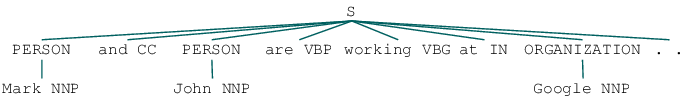

In [106]:
from nltk import word_tokenize, pos_tag, ne_chunk
sentence = "Mark and John are working at Google."
ne= ne_chunk(pos_tag(word_tokenize(sentence)))
ne